#  Assignment 1

## -- Name: Swapnil Pardeshi and Ayush Sanghavi 
## -- IU UserID: (swpard@iu.edu , sanghavi@iu.edu)

In [2]:
# All Imports in this cell
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/

#### 1. Create a Python function to load the data from your local directory. Display the top few rows of the data.

In [4]:
def load_data(path: str, file_name: str):  #Created a function
    file_full_path = os.path.join(path, file_name)
    df = pd.read_csv(file_full_path)
    return df

In [5]:
df = load_data('./', 'housing_data.csv')
#Function called with two parameters, i.e path and file name.

In [6]:
df.head() #Displaying the top 5 rows of the dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


---
***
___

#### 2. How many data samples are present in the dataset? 
#### What attributes/features are continuous valued?  Which attributes are categorical?

In [7]:
    df.info() 
#   Info() is used to print information about a DataFrame including the index dtype and column dtypes, 
#   non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


<span style='color: green'> **4600 samples are present in dataset. 18 columns.**

In [8]:
# Reference : https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/#:~:text=Categorical%20variables%20contain%20a%20finite%20number%20of%20categories%20or%20distinct%20groups.&text=Continuous%20variables%20are%20numeric%20variables,time%20a%20payment%20is%20received.

### Categorical Attributes: 
### Categorical variables contain a finite number of categories or distinct groups.
* Bedrooms
* Bathrooms
* Waterfront
* View and Condition
* Year Built
* Year Renovated
* Date
* City
* StateZip

### Continuous Attributes:
### Continuous variables are numeric variables that have an infinite number of values between any two values. 
* Price
* sqft_living
* sqft_lot
* sqft_above
* sqft_basement

In [9]:
df['waterfront'].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [10]:
df['view'].value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [11]:
df['condition'].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

---
***
___

#### 3. Remove the date, street and country attributes.

In [13]:
# Ref : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
df = df.drop([ 'date', 'street', 'country' ], axis=1)

In [14]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,0,1954,1979,Seattle,WA 98133
4596,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4597,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,0,2009,0,Renton,WA 98059
4598,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,1020,1974,0,Seattle,WA 98178


___
***
---

#### 4. Display the statistical values for each of the attributes, along with visualizations of the distributions for  each  attribute.
#### Explain  noticeable  traits  for  key  attributes.   Are  there  any  attributes  that  might  require  special  treatment?   
#### If  so,  what  special  treatment  might  they require?

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000,4600.00000
mean,551962.98847,3.40087,2.16082,2139.34696,14852.51609,1.51207,0.00717,0.24065,3.45174,1827.26543,312.08152,1970.78630,808.60826
std,563834.70255,0.90885,0.78378,963.20692,35884.43614,0.53829,0.08440,0.77840,0.67723,862.16898,464.13723,29.73185,979.41454
min,0.00000,0.00000,0.00000,370.00000,638.00000,1.00000,0.00000,0.00000,1.00000,370.00000,0.00000,1900.00000,0.00000
25%,322875.00000,3.00000,1.75000,1460.00000,5000.75000,1.00000,0.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,0.00000
50%,460943.46154,3.00000,2.25000,1980.00000,7683.00000,1.50000,0.00000,0.00000,3.00000,1590.00000,0.00000,1976.00000,0.00000
75%,654962.50000,4.00000,2.50000,2620.00000,11001.25000,2.00000,0.00000,0.00000,4.00000,2300.00000,610.00000,1997.00000,1999.00000
max,26590000.00000,9.00000,8.00000,13540.00000,1074218.00000,3.50000,1.00000,4.00000,5.00000,9410.00000,4820.00000,2014.00000,2014.00000


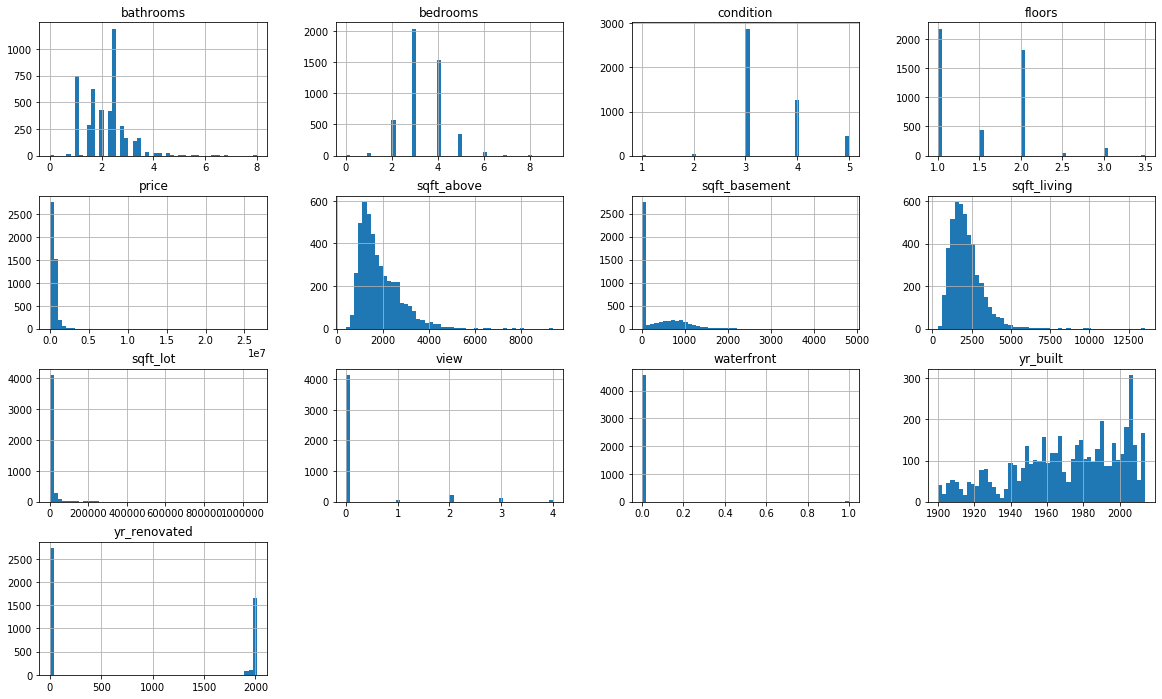

In [16]:
df.hist(bins=50, figsize=(20,12))
plt.show()

Reference : https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37
<span style='color:green'>  
    - Price column has zero values and will need to be imputed. Remove zero valued tuples, or replace zeros with median / mean 
    
    - More than 50% of the values in yt_renovated, sqft_basement, sqft_lot are zeroes. We can create derived column having boolean to display if value is zero or non zero.
    
    - From graph we can see that sqft_above and sqft_living are right skewed. 
    
    - All features have different scale and that need to be fixed with normalization / standardisation
    
    - yr_built is multimodal. We can reduce the multimodality by putting in all the records into bucket ranges of yr_built ranges

---
***
___

#### 5. Notice that some of the instances have a value of zero for the house price.  
#### Write two functions. One that computes the mean house price from the non-zero instances.  
#### One that computesthe median house price for the non-zero instances. Note that you should not use the built-in median and mean functions to do this, but should compute it yourself.
#### You can, however,compare the result of your functions to the built-in functions to verify your implementation.

In [17]:
def get_mean(df):
    vector = df['price'][df['price'] > 0]    # Filtering zeores
    total_size = vector.count()
    total_sum = sum(vector)
    return total_sum / total_size

mean = get_mean(df)
mean

557905.8991379443

In [18]:
# Reference : https://stackabuse.com/calculating-mean-median-and-mode-in-python/
_mean = df['price'][df['price'] > 0].mean() # Calculating mean using in-built mean function for validation purposes.
_mean 

557905.8991379443

In [19]:
assert(mean == _mean)

In [20]:
def get_median(df):
    vector = df['price'][df['price'] > 0]    # Filtering zeores
    sorted_df = sorted(vector)
    size = len(sorted_df)
    if size % 2 == 0:
        median = sum(sorted_df[size/2:(size/2)-1]) / 2
        return median
    else:
        median = sorted_df[size // 2]
        return median

median = get_median(df)
median

465000.0

In [21]:
_median = df['price'][df['price'] > 0].median()
_median

465000.0

In [22]:
assert(median == _median)

___
***
___

#### 6. Create three instances of the dataset:  
#### (1) that removes all instances of houses with prices ofzero, 
#### (2) that replaces the zero-priced houses with the median price value from the non-zeropriced houses, using your median function from above and 
#### (3) that replaces the zero-pricedhouses with the mean price value from the non-zero priced houses,  using your mean valuefunction above. 
#### Generate histogram plots of the house prices for the four cases (e.g.  original, $0 priced homes removed, median replaced, and mean replaced).

In [23]:
zero_count = df['price'][df['price'] == 0].count()
df_zero_removed = df[df['price'] > 0]
df_zero_removed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,0,1954,1979,Seattle,WA 98133
4596,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4597,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,0,2009,0,Renton,WA 98059
4598,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,1020,1974,0,Seattle,WA 98178


In [24]:
assert(df_zero_removed['price'][df_zero_removed['price'] == 0].count() == 0)   # No zero values should be present.
assert(df_zero_removed['price'].count() == (df['price'].count() - zero_count))

In [25]:
# Ref : https://stackoverflow.com/questions/37506488/python-pandas-dataframe-replace-0-with-median-value
df_median = df.copy()
df_median['price'] = df_median['price'].map(lambda x: median if x <= 0 else x)
df_median

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,0,1954,1979,Seattle,WA 98133
4596,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4597,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,0,2009,0,Renton,WA 98059
4598,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,1020,1974,0,Seattle,WA 98178


In [26]:
assert(df_median['price'][df_median['price'] == 0].count() == 0)        # No zero price is present.

In [27]:
df_mean = df.copy()
df_mean['price'] = df_median['price'].map(lambda x: mean if x <= 0 else x)
df_mean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,0,1954,1979,Seattle,WA 98133
4596,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4597,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,0,2009,0,Renton,WA 98059
4598,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,1020,1974,0,Seattle,WA 98178


In [28]:
assert(df_mean['price'][df_mean['price'] == 0].count() == 0)        # No zero price is present.

<span style='color:green'> Created three datasets <br/>
df_zero_removed => doesnt contain any zero priced values <br/>
df_median => replaced zero values with median of the column <br/>
df_mean => replaced zero values with mean of the column <br/>
df => original dataset

#### 7. For each of the above instances, visualize the dependency of the target on each continuous-valued feature 
#### (e.g.  2D scatter plot).  What features seem to be linearly correlated with the target?  
#### What features do not have a correlation with the target?

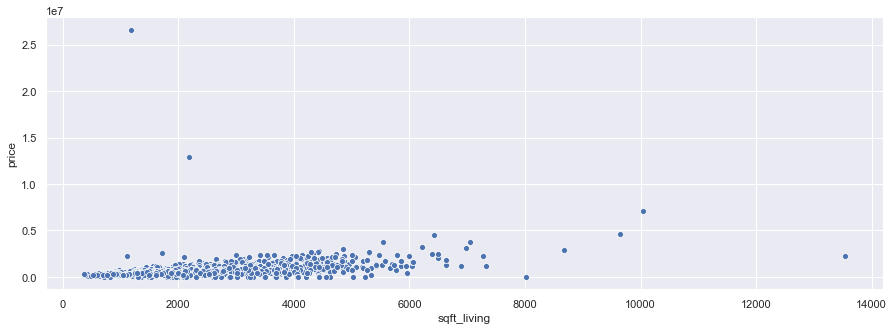

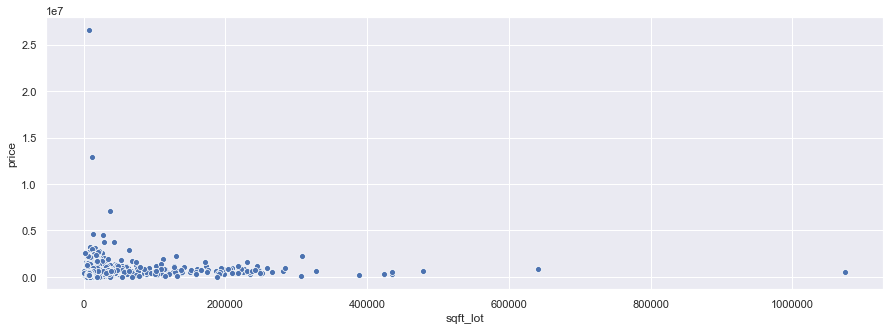

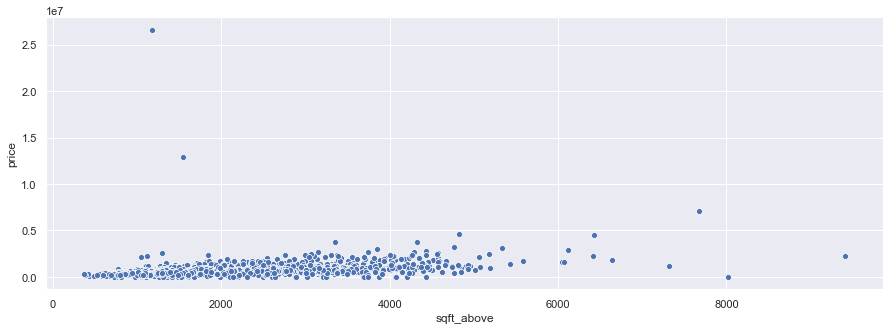

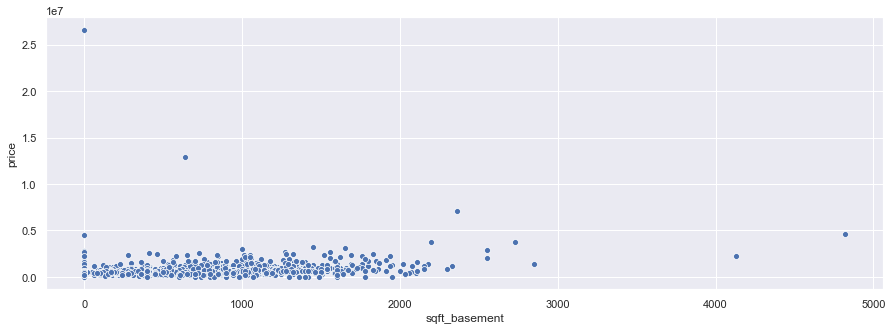

In [29]:
# Reference : https://seaborn.pydata.org/tutorial/distributions.html

# Using seaborne for plotting graph
sns.set(rc={'figure.figsize':(15,5)})
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.show()
sns.scatterplot(x='sqft_lot', y='price', data=df)
plt.show()
sns.scatterplot(x='sqft_above', y='price', data=df)
plt.show()
sns.scatterplot(x='sqft_basement', y='price', data=df)
plt.show()

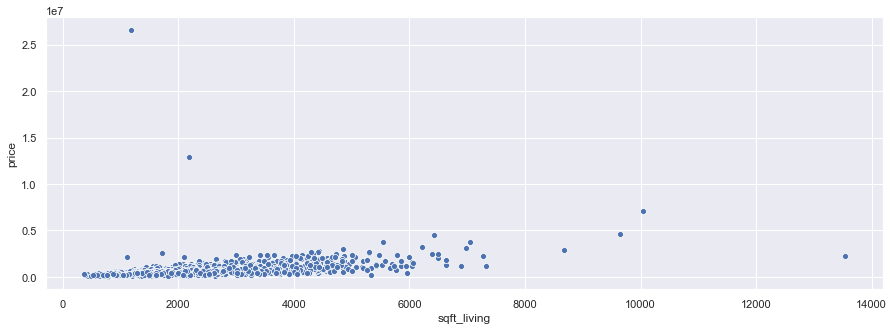

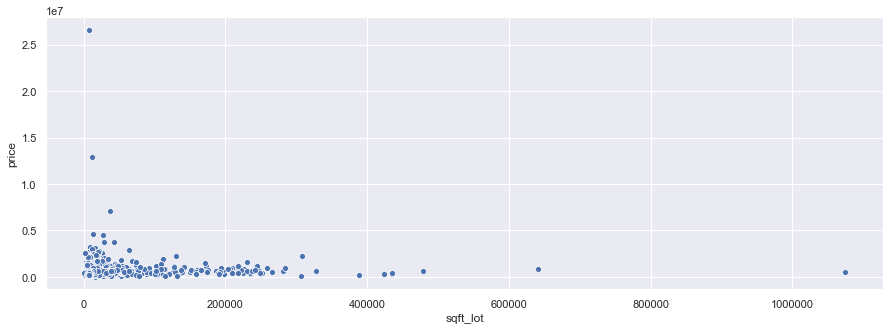

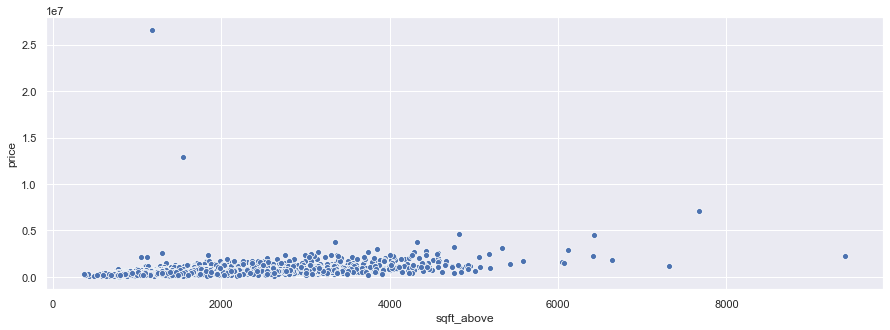

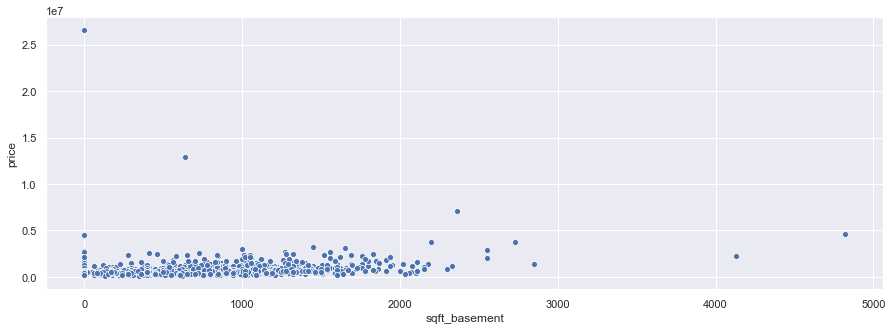

In [30]:
sns.set(rc={'figure.figsize':(15,5)})
sns.scatterplot(x='sqft_living', y='price', data=df_zero_removed)
plt.show()
sns.scatterplot(x='sqft_lot', y='price', data=df_zero_removed)
plt.show()
sns.scatterplot(x='sqft_above', y='price', data=df_zero_removed)
plt.show()
sns.scatterplot(x='sqft_basement', y='price', data=df_zero_removed)
plt.show()

<span style='color:green'> Continuous valued features = sqft_living, sqft_lot, sqft_above, sqft_basement

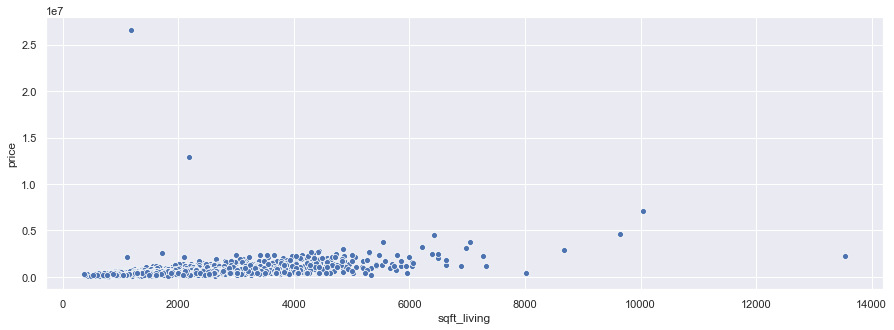

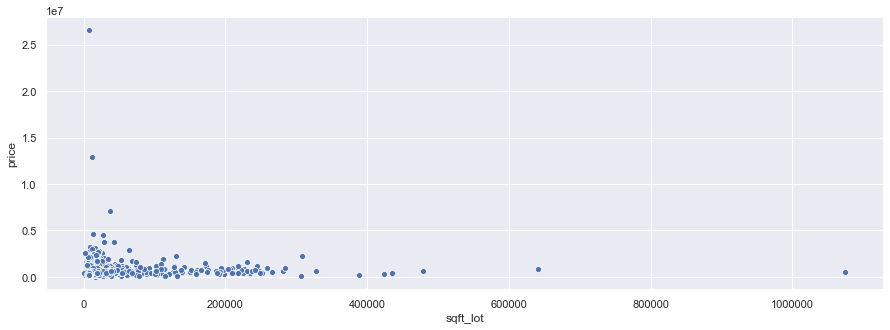

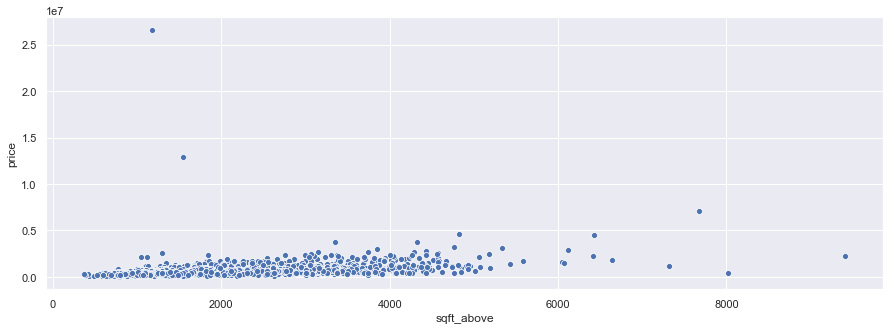

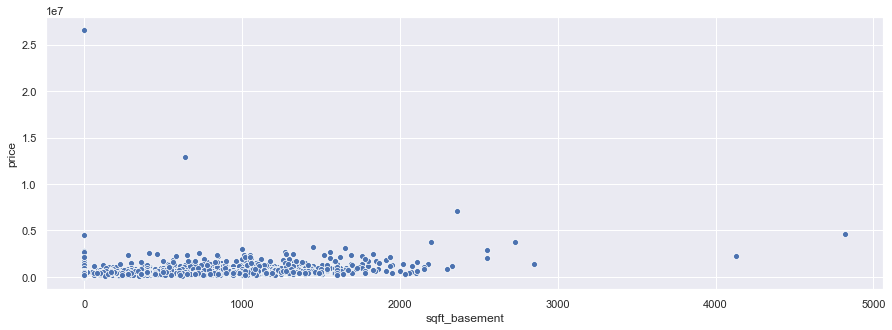

In [31]:
sns.set(rc={'figure.figsize':(15,5)})
sns.scatterplot(x='sqft_living', y='price', data=df_mean)
plt.show()
sns.scatterplot(x='sqft_lot', y='price', data=df_mean)
plt.show()
sns.scatterplot(x='sqft_above', y='price', data=df_mean)
plt.show()
sns.scatterplot(x='sqft_basement', y='price', data=df_mean)
plt.show()

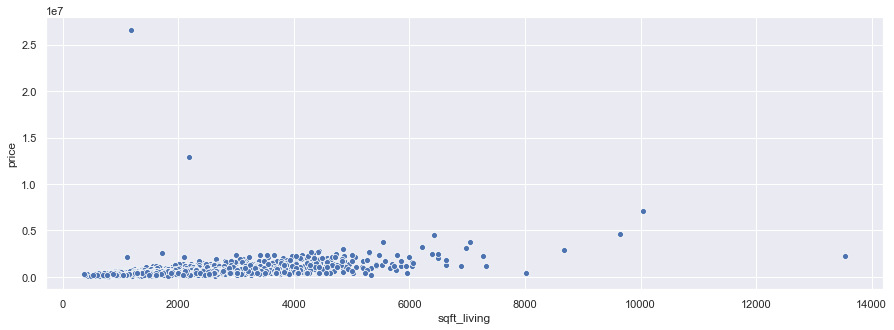

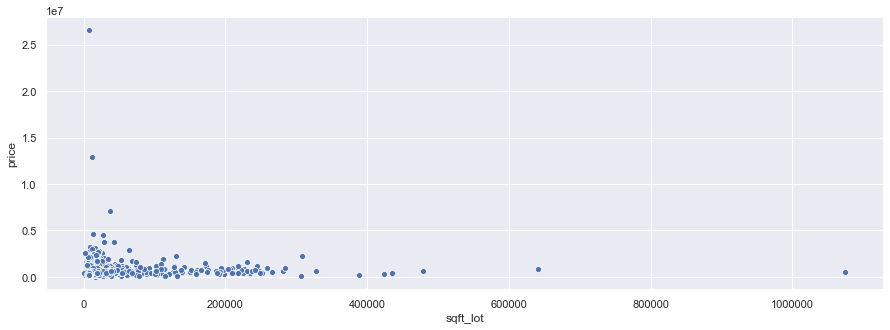

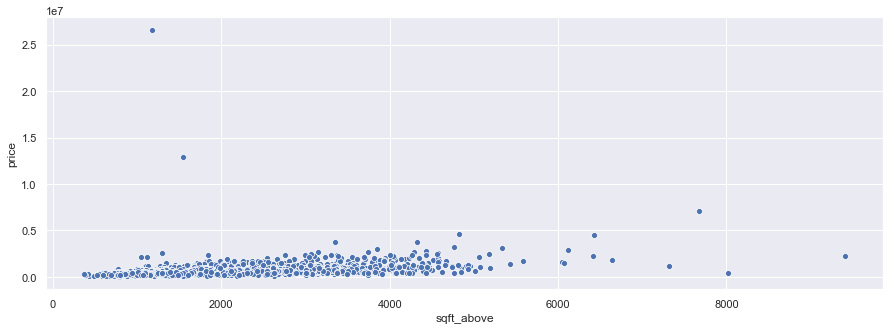

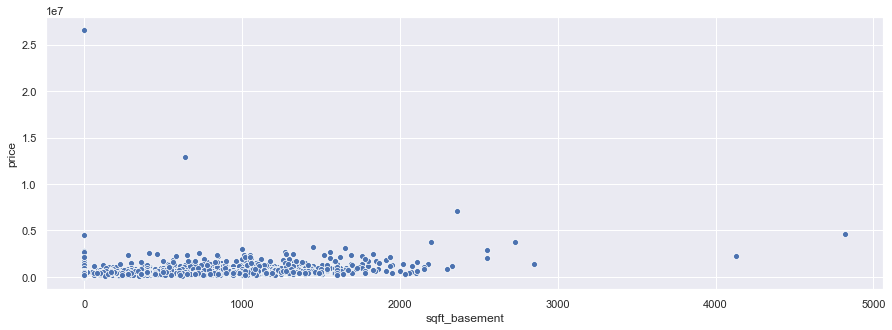

In [32]:
sns.set(rc={'figure.figsize':(15,5)})
sns.scatterplot(x='sqft_living', y='price', data=df_median)
plt.show()
sns.scatterplot(x='sqft_lot', y='price', data=df_median)
plt.show()
sns.scatterplot(x='sqft_above', y='price', data=df_median)
plt.show()
sns.scatterplot(x='sqft_basement', y='price', data=df_median)
plt.show()

#### <span style="color:green"> There is weak correlation between price and sqft_above, sqft_living . <br/><br/> There is very weak between price and sqft_lot, sqft_basement.

#### 8. Write your own function that computes the correlation coefficient between the target and the continuous valued features.  
#### Do the resulting correlation coefficients agree with your visual inspection of linear correlation?  
#### Why or why not?  How do the correlation coefficients differ for each set (e.g.  original, $0 priced homes removed, median replaced, and mean replaced)?

In [33]:
# Reference :  https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/

def pearson_correlation(data, field1, field2):
    one = data[field1] - data[field1].mean()
    two = data[field2] - data[field2].mean()
    s = sum(one*two)
    three = (sum(one**2))**0.5
    four = (sum(two**2))**0.5
    result = (s / (three * four))
    return (result)

In [34]:
pc = pearson_correlation(df, 'price', 'sqft_living') # Correlation coefficient for original dataset
pc_nonzero = pearson_correlation(df_zero_removed, 'price', 'sqft_living') # Correlation coefficient for zero removed dataset
pc_mean = pearson_correlation(df_mean, 'price', 'sqft_living') # Correlation coefficient for mean replaced dataset
pc_median = pearson_correlation(df_median, 'price', 'sqft_living') # # Correlation coefficient for median replaced dataset

In [35]:
pc, pc_nonzero, pc_mean, pc_median # printing all the co-efficients of each dataset.

(0.4304100254326293,
 0.4454937084813834,
 0.43852523913649255,
 0.43852523913649255)

In [36]:
for field in ['sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement']:
    for d in [df, df_zero_removed, df_mean, df_median]:
        print(f'PC: price: {field}', pearson_correlation(d, 'price', field ))

PC: price: sqft_lot 0.050451295032348964
PC: price: sqft_lot 0.051347330073748025
PC: price: sqft_lot 0.05110029723663882
PC: price: sqft_lot 0.05110029723663882
PC: price: sqft_living 0.4304100254326293
PC: price: sqft_living 0.4454937084813834
PC: price: sqft_living 0.43852523913649255
PC: price: sqft_living 0.43852523913649255
PC: price: sqft_above 0.36756960160042657
PC: price: sqft_above 0.38066094088424746
PC: price: sqft_above 0.3742261140852824
PC: price: sqft_above 0.3742261140852824
PC: price: sqft_basement 0.2104265717748264
PC: price: sqft_basement 0.21778232590197202
PC: price: sqft_basement 0.21490281560445024
PC: price: sqft_basement 0.21490281560445024


#### <span style='color:green'> There is very slight difference in correlations among the all data sets.
#### <span style='color:green'> And results agree with visual inspection. i.e. Weak relation between sqft_living, sqft_above.
#### <span style='color:green'> And very weak between sqft_lot and sqft_basement    

#### 9. Use OneHotEncoder to encode each variable that you deem should be converted, for each dataset (e.g. original, $0 priced homes removed, median replaced, and mean replaced).  For each variable that you encode, provide a rationale or justification for why it needs to be encoded.Also, provide a rationale for the variables that you choose not to encode. 

______

When we look at data first, we wonder how will the numeric model handle textual data? We know that machine learning models are good with numeric data. So to avoid incorporating the textual data is to introduce integer encoding or label encoding, where-in the text data is assigned distinct integer values, where we convert the values into integers. Now when we give numbers as values, the model may assume and take into consideration the numeric value and make assumptions that one integer is less than the other so it may give the higher one more preference or something like that. To avoid this conflicting values, we use one hot encoding, where we assign binary values to some attributes.

In our housing dataset we apply one hot encoding to the following columns:
* city
* statezip

In this housing dataset, all our columns have numeric values except the city column and the statezip coulumn. Now since, these categorical values are nominal values - there is no particular numeric order relationship between them unlike ordinal values where the numeric values have a relationship order, we assign all the city and statezip values binary values and concat it to our dataset. This means, that if a city value is 1, that means the item has that city true in its row values. Same for statezip values. This helps the model handle data more efficiently and correctly. This can help in both making the problem easier for the network to model. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label.



#For all other attributes, we don't apply one hot encoding since they already have numeric and ordinal values and hence the model would be able to handle data efficiently unlike textual values.

In [37]:
# Reference: https://stackoverflow.com/questions/44527731/one-hot-encoding-for-frequent-values-only
# Reference :https://stackoverflow.com/questions/37265312/how-to-create-dummies-for-certain-columns-by-pandas-get-dummies-method

# Using dummies value method.
# This approach is more flexible because it allows encoding as many category columns as you
# would like and choose how to label the columns using a prefix. 
#Performed One hot encoding on city and statezip and concatenated to the original dataset

city_dummy = pd.get_dummies(df.city, prefix='city')
statezip_dummy = pd.get_dummies(df.statezip, prefix='statezip')
df_OHE = pd.concat([df, city_dummy, statezip_dummy],axis='columns').drop(['city', 'statezip'], axis=1)
df_OHE

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4596,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,...,0,0,0,0,1,0,0,0,0,0


In [38]:
#Performed One hot encoding on city and statezip and concatenated to the zero removed dataframe

city_dummy = pd.get_dummies(df_zero_removed.city, prefix='city')
statezip_dummy = pd.get_dummies(df_zero_removed.statezip, prefix='statezip')
df_zero_removed_OHE = pd.concat([df_zero_removed, city_dummy,statezip_dummy],axis='columns').drop(['city', 'statezip'], axis=1)
df_zero_removed_OHE

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4596,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,...,0,0,0,0,1,0,0,0,0,0


In [39]:
#Performed One hot encoding on city and statezip and concatenated to the mean replaced dataframe

city_dummy = pd.get_dummies(df_mean.city, prefix='city')
statezip_dummy = pd.get_dummies(df_mean.statezip, prefix='statezip')

df_mean_OHE = pd.concat([df_mean, city_dummy, statezip_dummy],axis='columns').drop(['city', 'statezip'], axis=1)
df_mean_OHE

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4596,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,...,0,0,0,0,1,0,0,0,0,0


In [40]:
#Performed One hot encoding on city and statezip and concatenated to the median replaced dataframe

city_dummy = pd.get_dummies(df_median.city, prefix='city')
statezip_dummy = pd.get_dummies(df_median.statezip, prefix='statezip')

df_median_OHE = pd.concat([df_median, city_dummy,statezip_dummy],axis='columns').drop(['city', 'statezip'], axis=1)
df_median_OHE

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4596,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,...,0,0,0,0,1,0,0,0,0,0


#### 10. For the continuous variables and the ones where one-hot encoding is not applied, separately perform normalization (min-max scaling) and standardization for each of these variables, for each dataset.  
#### Hence, you should have eight different versions of the dataset after this step. Show and verify that the data has been converted correctly in each case. 

______

#### Continous variables where one-hot encoding is not applied: 
#### We will be applying normalisation and standardisation on the following variables.

* price
* sqft_living
* sqft_lot
* sqft_above
* sqft_basement
* yr_built
* yr_renovated



### 1) Performing Normalization

In [41]:
# This is not working

# def normalize2(matrix):
#     dataframe = matrix.copy()
#     columns = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement', 'yr_built', 'yr_renovated']
#     minmax_scaler = MinMaxScaler()
#     numpy_matrix = minmax_scaler.fit_transform(dataframe[columns])
#     normalized_df = pd.DataFrame(numpy_matrix, columns=columns)
#     dataframe[columns] = normalized_df
#     return dataframe


# This works.

# Reference : https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
def normalize(matrix):
    data = matrix.copy()
    for i in ["price","sqft_lot","sqft_above","sqft_basement","sqft_living","yr_built","yr_renovated"]:
        data[i]=(data[i]-data[i].min())/(data[i].max()-data[i].min())
#         data[[i]] = MinMaxScaler().fit_transform(data[[i]])
    return data

In [42]:
# Calling the functions and passing the respective datasets and storing the same in a new variable
df_OHE_normalized = normalize(df_OHE)
df_zero_removed_OHE_normalized = normalize(df_zero_removed_OHE)
df_mean_OHE_normalized = normalize(df_mean_OHE)
df_median_OHE_normalized = normalize(df_median_OHE)

In [43]:
df_OHE_normalized.head()




,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,0.01177,3.00000,1.50000,0.07365,0.00678,1.50000,0,0,3,0.10730,...,0,0,0,0,0,0,0,0,0,0
1,0.08966,5.00000,2.50000,0.24905,0.00784,2.00000,0,4,5,0.33186,...,0,0,0,0,0,0,0,0,0,0
2,0.01286,3.00000,2.00000,0.11845,0.01053,1.00000,0,0,4,0.17257,...,0,0,0,0,0,0,0,0,0,0
3,0.01580,3.00000,2.25000,0.12377,0.00689,1.00000,0,0,4,0.06969,...,0,0,0,0,0,0,0,0,0,0
4,0.02068,4.00000,2.50000,0.11921,0.00919,1.00000,0,0,4,0.08518,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_zero_removed_OHE_normalized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,0.01148,3.00000,1.50000,0.07365,0.00678,1.50000,0,0,3,0.10730,...,0,0,0,0,0,0,0,0,0,0
1,0.08939,5.00000,2.50000,0.24905,0.00784,2.00000,0,4,5,0.33186,...,0,0,0,0,0,0,0,0,0,0
2,0.01257,3.00000,2.00000,0.11845,0.01053,1.00000,0,0,4,0.17257,...,0,0,0,0,0,0,0,0,0,0
3,0.01551,3.00000,2.25000,0.12377,0.00689,1.00000,0,0,4,0.06969,...,0,0,0,0,0,0,0,0,0,0
4,0.02040,4.00000,2.50000,0.11921,0.00919,1.00000,0,0,4,0.08518,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_mean_OHE_normalized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,0.01148,3.00000,1.50000,0.07365,0.00678,1.50000,0,0,3,0.10730,...,0,0,0,0,0,0,0,0,0,0
1,0.08939,5.00000,2.50000,0.24905,0.00784,2.00000,0,4,5,0.33186,...,0,0,0,0,0,0,0,0,0,0
2,0.01257,3.00000,2.00000,0.11845,0.01053,1.00000,0,0,4,0.17257,...,0,0,0,0,0,0,0,0,0,0
3,0.01551,3.00000,2.25000,0.12377,0.00689,1.00000,0,0,4,0.06969,...,0,0,0,0,0,0,0,0,0,0
4,0.02040,4.00000,2.50000,0.11921,0.00919,1.00000,0,0,4,0.08518,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_median_OHE_normalized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,0.01148,3.00000,1.50000,0.07365,0.00678,1.50000,0,0,3,0.10730,...,0,0,0,0,0,0,0,0,0,0
1,0.08939,5.00000,2.50000,0.24905,0.00784,2.00000,0,4,5,0.33186,...,0,0,0,0,0,0,0,0,0,0
2,0.01257,3.00000,2.00000,0.11845,0.01053,1.00000,0,0,4,0.17257,...,0,0,0,0,0,0,0,0,0,0
3,0.01551,3.00000,2.25000,0.12377,0.00689,1.00000,0,0,4,0.06969,...,0,0,0,0,0,0,0,0,0,0
4,0.02040,4.00000,2.50000,0.11921,0.00919,1.00000,0,0,4,0.08518,...,0,0,0,0,0,0,0,0,0,0


### 2) Performing Standarization

In [47]:
# # This is not working
# def standarize2(matrix):
#     dataframe = matrix.copy()
#     columns = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement']
#     standard_scaler = StandardScaler()
#     numpy_matrix = standard_scaler.fit_transform(dataframe[columns])
#     normalized_df = pd.DataFrame(numpy_matrix, columns=columns)
#     dataframe[columns] = normalized_df
#     return dataframe


# This works
# Reference : https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
def standarize(matrix):
    data = matrix.copy()
    for i in ["price","sqft_lot","sqft_above","sqft_basement","sqft_living","yr_built","yr_renovated"]:
        data[[i]] = StandardScaler().fit_transform(data[[i]])
    return data

In [48]:
# Calling the functions and passing the respective datasets and storing the same in a new variable

df_OHE_standarized = standarize(df_OHE)
df_zero_removed_OHE_standarized = standarize(df_zero_removed_OHE)
df_mean_OHE_standarized = standarize(df_mean_OHE)
df_median_OHE_standarized = standarize(df_median_OHE)

In [49]:
df_OHE_standarized.head()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,-0.42386,3.00000,1.50000,-0.82997,-0.19343,1.50000,0,0,3,-0.56522,...,0,0,0,0,0,0,0,0,0,0
1,3.24960,5.00000,2.50000,1.56853,-0.16172,2.00000,0,4,5,1.78956,...,0,0,0,0,0,0,0,0,0,0
2,-0.37242,3.00000,2.00000,-0.21737,-0.08098,1.00000,0,0,4,0.11917,...,0,0,0,0,0,0,0,0,0,0
3,-0.23407,3.00000,2.25000,-0.14469,-0.19015,1.00000,0,0,4,-0.95962,...,0,0,0,0,0,0,0,0,0,0
4,-0.00348,4.00000,2.50000,-0.20698,-0.12131,1.00000,0,0,4,-0.79722,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_zero_removed_OHE_standarized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,-0.43433,3.00000,1.50000,-0.82898,-0.19253,1.50000,0,0,3,-0.56443,...,0,0,0,0,0,0,0,0,0,0
1,3.23851,5.00000,2.50000,1.58773,-0.16088,2.00000,0,4,5,1.81163,...,0,0,0,0,0,0,0,0,0,0
2,-0.38290,3.00000,2.00000,-0.21172,-0.08032,1.00000,0,0,4,0.12615,...,0,0,0,0,0,0,0,0,0,0
3,-0.24457,3.00000,2.25000,-0.13849,-0.18925,1.00000,0,0,4,-0.96238,...,0,0,0,0,0,0,0,0,0,0
4,-0.01402,4.00000,2.50000,-0.20126,-0.12056,1.00000,0,0,4,-0.79852,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_mean_OHE_standarized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,-0.43484,3.00000,1.50000,-0.82997,-0.19343,1.50000,0,0,3,-0.56522,...,0,0,0,0,0,0,0,0,0,0
1,3.25720,5.00000,2.50000,1.56853,-0.16172,2.00000,0,4,5,1.78956,...,0,0,0,0,0,0,0,0,0,0
2,-0.38314,3.00000,2.00000,-0.21737,-0.08098,1.00000,0,0,4,0.11917,...,0,0,0,0,0,0,0,0,0,0
3,-0.24408,3.00000,2.25000,-0.14469,-0.19015,1.00000,0,0,4,-0.95962,...,0,0,0,0,0,0,0,0,0,0
4,-0.01233,4.00000,2.50000,-0.20698,-0.12131,1.00000,0,0,4,-0.79722,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_median_OHE_standarized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,-0.43484,3.00000,1.50000,-0.82997,-0.19343,1.50000,0,0,3,-0.56522,...,0,0,0,0,0,0,0,0,0,0
1,3.25720,5.00000,2.50000,1.56853,-0.16172,2.00000,0,4,5,1.78956,...,0,0,0,0,0,0,0,0,0,0
2,-0.38314,3.00000,2.00000,-0.21737,-0.08098,1.00000,0,0,4,0.11917,...,0,0,0,0,0,0,0,0,0,0
3,-0.24408,3.00000,2.25000,-0.14469,-0.19015,1.00000,0,0,4,-0.95962,...,0,0,0,0,0,0,0,0,0,0
4,-0.01233,4.00000,2.50000,-0.20698,-0.12131,1.00000,0,0,4,-0.79722,...,0,0,0,0,0,0,0,0,0,0


#### 11. For each data set (eight in total), us Scikit-learns KFold object to generate 10 folds of training and testing sets for cross validation. 
#### Be sure to set the random state variable.  For each fold,train a Linear Regression model (see chapter 2 of ”Hands-on Machine Learning...”) using the training data.  Then make predictions of the housing prices of the test data, using the trained model. 

#### 12.Write a function to compute the mean absolute error and mean square error for each fold of each data set.
#### Report the results and discuss how different factors may have contributed tothe final results. 

In [53]:
# Created a function to calculate the mean absolute error
# Reference : https://medium.com/@ewuramaminka/mean-absolute-error-mae-sample-calculation-6eed6743838a
def mean_absolute_error(y_pred, y_actual):
    result = ( sum( abs(y_pred-y_actual) ) / len(y_pred) )
    return result
    

In [54]:
# Created a function to calculate root mean square error
# Reference : https://www.askpython.com/python/examples/rmse-root-mean-square-error
def mean_square_error(y_pred, y_actual):
    result = np.sqrt( sum( np.square(y_pred-y_actual) ) / len(y_pred))
    return result

In [55]:
# Reference : https://www.youtube.com/watch?v=gJo0uNL-5Qw
# Reference : https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a
from sklearn.base import clone
def get_result(dataframe):
    lrr = LinearRegression()
    kf = KFold(n_splits = 10, shuffle=True,random_state = 42)
    mae = []
    rmse = []
    x_train = dataframe.iloc[:, 1:].values # Initializing our training dataset
    y_train = dataframe.iloc[:, 0].values # Initialising the target 
    for train_index, test_index in kf.split(x_train, y_train):
#         print(len(train_index), len(test_index))
        lr = clone(lrr) # cloning a linear regression object
        x_train_fold, y_train_fold = x_train[train_index], y_train[train_index]
        x_test_fold, y_test_fold = x_train[test_index], y_train[test_index] 
        lr.fit(x_train_fold, y_train_fold) # Passing parameters to the fit function of the lr object. 
        y_pred = lr.predict(x_test_fold)
        _mae =  round(mean_absolute_error(y_pred,y_test_fold), 4) # Calling function mean_absolute_error
        _rmse = round(mean_square_error(y_pred,y_test_fold), 4) # Calling function mean_square_error
        mae.append(_mae) 
        rmse.append(_rmse)
    return (mae, rmse) # Function returns the Mean Absolute Error and Root Mean Absolute Error

### In the following lines of code, we have called the above function and passed the 8 datasets

### 1) original + OHE + Normalized

In [56]:
mae, rmse =  get_result(df_OHE_normalized)
result = {'Mean Absolute Error': mae, 'Root Mean Absolute Error': rmse}
result_OHE_normalized = pd.DataFrame(data=result)
result_OHE_normalized

,Mean Absolute Error,Root Mean Absolute Error
0,2504733.41410,37986162.93370
1,35734.51080,766419.70880
2,320309.55590,6869874.52710
3,144482.47310,3098803.73800
4,0.00500,0.01000
5,0.00440,0.00850
6,0.00440,0.00820
7,0.00440,0.00860
8,540623.58680,11595084.07560
9,0.00400,0.00610


### 2) zero removed + OHE + Normalized

In [57]:
mae, rmse =  get_result(df_zero_removed_OHE_normalized)
result = {'Mean Absolute Error': mae, 'Root Mean Absolute Error': rmse}
result_zero_removed_OHE_normalized = pd.DataFrame(data=result)
result_zero_removed_OHE_normalized

,Mean Absolute Error,Root Mean Absolute Error
0,0.00430,0.00750
1,455658.01960,5103479.74740
2,0.00400,0.00610
3,14292377.43490,304866829.81020
4,0.00480,0.02250
5,0.00430,0.00730
6,0.00410,0.00710
7,0.00430,0.00820
8,119519.53020,2549438.62270
9,0.00390,0.00590


### 3) Mean replaced + OHE + Normalized

In [58]:
mae, rmse =  get_result(df_mean_OHE_normalized)
result = {'Mean Absolute Error': mae, 'Root Mean Absolute Error': rmse}
result_mean_OHE_normalized = pd.DataFrame(data=result)
result_mean_OHE_normalized

,Mean Absolute Error,Root Mean Absolute Error
0,2371013.00020,35958192.45010
1,35241.64100,755848.83160
2,103485.11810,2219508.42130
3,166472.88900,3570445.61480
4,0.00450,0.00890
5,0.00430,0.00800
6,0.00430,0.00760
7,0.00430,0.00820
8,555234.97740,11908463.49210
9,0.00390,0.00580


### 4) Median replaced + OHE + Normalized

In [59]:
mae, rmse =  get_result(df_median_OHE_normalized)
result = {'Mean Absolute Error': mae, 'Root Mean Absolute Error': rmse}
result_median_OHE_normalized = pd.DataFrame(data=result)
result_mean_OHE_normalized

,Mean Absolute Error,Root Mean Absolute Error
0,2371013.00020,35958192.45010
1,35241.64100,755848.83160
2,103485.11810,2219508.42130
3,166472.88900,3570445.61480
4,0.00450,0.00890
5,0.00430,0.00800
6,0.00430,0.00760
7,0.00430,0.00820
8,555234.97740,11908463.49210
9,0.00390,0.00580


### Original + OHE + Standarized

In [60]:
mae, rmse =  get_result(df_OHE_standarized)
result = {'Mean Absolute Error': mae, 'Root Mean Absolute Error': rmse}
result_OHE_standarized = pd.DataFrame(data=result)
result_OHE_standarized

,Mean Absolute Error,Root Mean Absolute Error
0,948354914.52180,14382514384.08320
1,115199528.48650,2470754619.35490
2,1228463.75100,26347607.66110
3,218646876.78060,4689453065.90600
4,0.23430,0.47290
5,0.20880,0.40190
6,0.20890,0.38710
7,0.20720,0.40470
8,22902398.68910,491201724.38830
9,0.18720,0.28830


### Original + Zero Removed + OHE + Standarized

In [61]:
mae, rmse =  get_result(df_zero_removed_OHE_standarized)
result = {'Mean Absolute Error': mae, 'Root Mean Absolute Error': rmse}
result_zero_removed_OHE_standarized = pd.DataFrame(data=result)
result_zero_removed_OHE_standarized

,Mean Absolute Error,Root Mean Absolute Error
0,0.20130,0.35490
1,1370439954.85440,15820053475.42450
2,0.18780,0.28600
3,118181237.31110,2520891940.76630
4,0.22790,1.05920
5,0.20380,0.34230
6,0.19120,0.33330
7,0.20430,0.38650
8,61334905.50230,1308318243.83160
9,0.18440,0.27650


### Original + Mean + OHE + Standarized

In [62]:
mae, rmse =  get_result(df_mean_OHE_standarized)
result = {'Mean Absolute Error': mae, 'Root Mean Absolute Error': rmse}
result_mean_OHE_standarized = pd.DataFrame(data=result)
result_mean_OHE_standarized

,Mean Absolute Error,Root Mean Absolute Error
0,943103433.77460,14302871735.30670
1,107949618.99590,2315261383.91710
2,1615823.17580,34655541.85700
3,216674759.03340,4647155852.41370
4,0.21560,0.42190
5,0.20170,0.37710
6,0.20240,0.35960
7,0.20360,0.38890
8,22660175.12890,486006607.84530
9,0.18300,0.27350


### Original + Median + OHE + Standarized

In [63]:
mae, rmse =  get_result(df_median_OHE_standarized)
result = {'Mean Absolute Error': mae, 'Root Mean Absolute Error': rmse}
result_median_OHE_standarized = pd.DataFrame(data=result)
result_median_OHE_standarized

,Mean Absolute Error,Root Mean Absolute Error
0,943103433.77460,14302871735.30670
1,107949618.99590,2315261383.91710
2,1615823.17580,34655541.85700
3,216674759.03340,4647155852.41370
4,0.21560,0.42190
5,0.20170,0.37710
6,0.20240,0.35960
7,0.20360,0.38890
8,22660175.12890,486006607.84530
9,0.18300,0.27350
